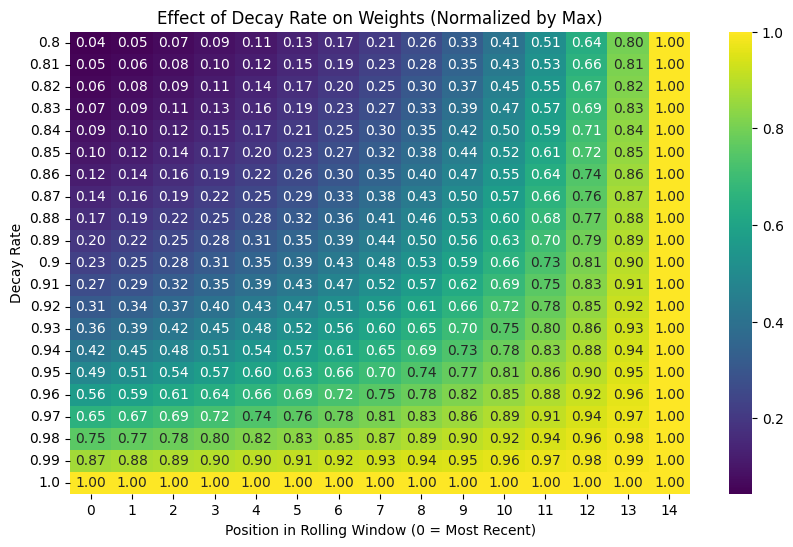

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
atr_window_size = 15
decay_rates = np.linspace(0.8, 1.0, 21)  # Example decay rates from 0.8 to 0.99
decay_rates = [round(a,5) for a in decay_rates]

# Initialize a DataFrame to hold the weights
weights_df = pd.DataFrame(index=np.arange(atr_window_size), columns=decay_rates)

# Calculate weights for each decay rate
for decay_rate in decay_rates:
    weights = np.array([decay_rate**i for i in range(atr_window_size)][::-1])
    weights /= weights.max()  # Normalize by the max weight (i.e., most recent data point)
    weights_df[decay_rate] = weights

# Transpose the DataFrame for better visualization
weights_df = weights_df.T

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weights_df, cmap='viridis', annot=True, fmt=".2f")
plt.title('Effect of Decay Rate on Weights (Normalized by Max)')
plt.xlabel('Position in Rolling Window (0 = Most Recent)')
plt.ylabel('Decay Rate')
plt.show()
